<a href="https://colab.research.google.com/github/Echevarriaj93/Pandas-Data-Science-Tasks/blob/master/DataJobSalaryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Data Science Projects Files/salaries.csv')

data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Engineer,166000,USD,166000,US,0,US,M
1,2023,SE,FT,Data Engineer,73100,USD,73100,US,0,US,M
2,2023,MI,FT,Business Intelligence Developer,140000,USD,140000,US,100,US,M
3,2023,MI,FT,Business Intelligence Developer,110000,USD,110000,US,100,US,M
4,2023,MI,FT,Data Scientist,130900,USD,130900,US,0,US,M


In [3]:
data.shape

(8545, 11)

In [4]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [189]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [255]:
#work year should be categorical no numeric

data.work_year = data.work_year.astype('category')

In [209]:
data.head(10).sort_values('salary_in_usd', ascending=False)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
6,2023,SE,FT,Machine Learning Engineer,333500,USD,333500,US,0,US,M
8,2023,SE,FT,Business Intelligence Engineer,180000,USD,180000,US,100,US,M
0,2023,SE,FT,Data Engineer,166000,USD,166000,US,0,US,M
7,2023,SE,FT,Machine Learning Engineer,144000,USD,144000,US,0,US,M
2,2023,MI,FT,Business Intelligence Developer,140000,USD,140000,US,100,US,M
4,2023,MI,FT,Data Scientist,130900,USD,130900,US,0,US,M
9,2023,SE,FT,Business Intelligence Engineer,118200,USD,118200,US,100,US,M
3,2023,MI,FT,Business Intelligence Developer,110000,USD,110000,US,100,US,M
1,2023,SE,FT,Data Engineer,73100,USD,73100,US,0,US,M
5,2023,MI,FT,Data Scientist,72700,USD,72700,US,0,US,M


<Axes: xlabel='company_location'>

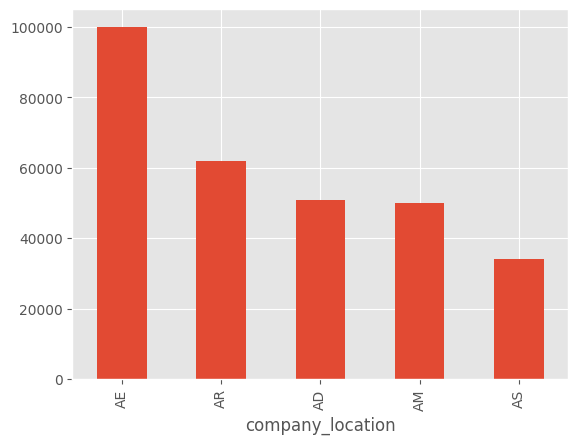

In [360]:
data.groupby(data['company_location'])['salary_in_usd'].mean().head().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='company_location'>

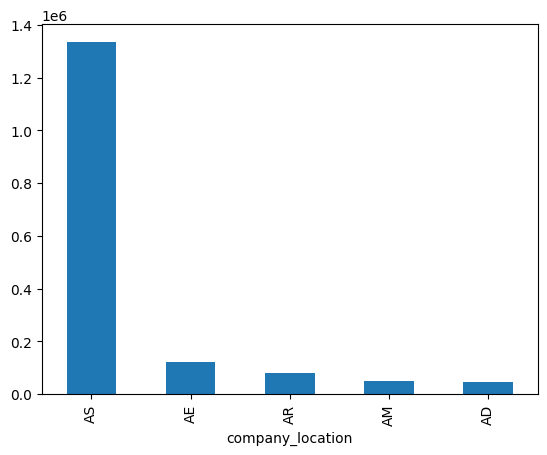

In [211]:
data.groupby(data['company_location'])['salary'].max().head().sort_values(ascending=False).plot(kind='bar')

In [212]:
data.groupby(data['company_location'])['salary_in_usd'].mean().head().sort_values(ascending=False)

company_location
AE    100000.0
AR     62000.0
AD     50745.0
AM     50000.0
AS     34026.5
Name: salary_in_usd, dtype: float64

In [213]:
#Only interested in US jobs

us_df = data[data['company_location'] == "US"]

In [214]:
us_df.sort_values('salary_in_usd', ascending=False)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
8327,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
8537,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
8472,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
8540,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8270,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
7854,2022,MI,FT,Data Engineer,24000,USD,24000,US,0,US,M
7853,2022,MI,FT,Data Engineer,24000,USD,24000,US,0,US,M
3874,2023,MI,FT,Applied Scientist,20000,USD,20000,NG,100,US,L
8490,2021,MI,FL,Data Engineer,20000,USD,20000,IT,0,US,L


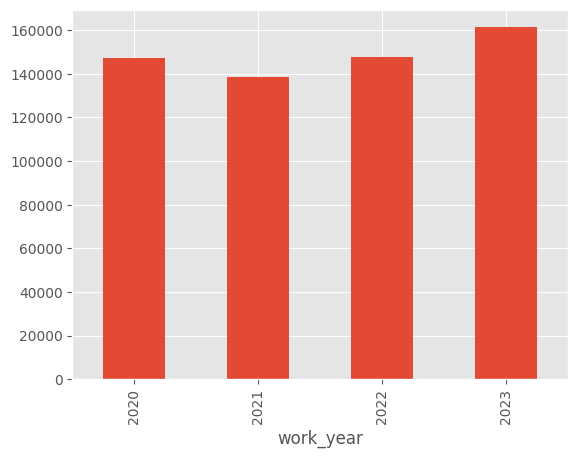

In [348]:
us_df.groupby('work_year')['salary_in_usd'].mean().plot(kind='bar')
plt.style.use('ggplot')

In [349]:
us_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [350]:

#too many titles I mostly care about analyst, scientist and engineer roles
#everything else might got in 'other'

us_df['job_title'].nunique()

33

In [351]:
#example: df.loc[df['Loan Title'].str.contains('refi'), 'Loan Title'] = 'Refinance'

us_df.loc[us_df['job_title'].str.contains('Scientist'),'job_title'] = 'Data Scientist'

us_df.loc[us_df['job_title'].str.contains('Data Analyst'),'job_title'] = 'Data Analyst'

us_df.loc[us_df['job_title'].str.contains('Engineer'),'job_title'] = 'Engineer'

us_df.loc[us_df['job_title'].str.contains('Director'),'job_title'] = 'Director of Data'

us_df.loc[us_df['job_title'].str.contains('Lead'),'job_title'] = 'Lead Data'

us_df.loc[us_df['job_title'].str.contains('Developer'),'job_title'] = 'Developer'

us_df.loc[us_df['job_title'].str.contains('Machine Learning'),'job_title'] = 'ML Engineer'

us_df.loc[us_df['job_title'].str.contains('Architect'),'job_title'] = 'Architect'

us_df.loc[us_df['job_title'].str.contains('Business Intelligence'),'job_title'] = 'BI'

us_df.loc[us_df['job_title'].str.contains('BI'),'job_title'] = 'BI'


In [352]:

us_df['job_title'].value_counts()

Engineer                         3230
Data Scientist                   2106
Data Analyst                     1150
Architect                         193
Data Manager                      120
Developer                          85
Data Science Manager               83
BI                                 63
Data Specialist                    38
Data Analytics Manager             37
Lead Data                          34
Data Science Consultant            29
Research Analyst                   24
Head of Data                       21
Director of Data                   19
Data Modeler                       18
Data Quality Analyst               18
Data Strategist                    16
Data Science Practitioner           8
Data Operations Analyst             8
Head of Data Science                7
Data Strategy Manager               4
Data Visualization Specialist       4
Data Integration Specialist         4
Data Management Specialist          4
Data Product Manager                4
Data Operati

In [353]:
#example:

'''pd.crosstab(index=df['top_or_other'], columns=df['laundry_options'], normalize='index').round(2).plot(kind='bar', stacked=True, figsize=(20,10))
plt.xlabel('Laundry Options', fontsize=15)
plt.ylabel('Ratios', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)'''

"pd.crosstab(index=df['top_or_other'], columns=df['laundry_options'], normalize='index').round(2).plot(kind='bar', stacked=True, figsize=(20,10))\nplt.xlabel('Laundry Options', fontsize=15)\nplt.ylabel('Ratios', fontsize=15)\nplt.xticks(fontsize=15)\nplt.yticks(fontsize=15)"

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000., 4500000.]),
 [Text(0, 0.0, '0.0'),
  Text(0, 500000.0, '0.5'),
  Text(0, 1000000.0, '1.0'),
  Text(0, 1500000.0, '1.5'),
  Text(0, 2000000.0, '2.0'),
  Text(0, 2500000.0, '2.5'),
  Text(0, 3000000.0, '3.0'),
  Text(0, 3500000.0, '3.5'),
  Text(0, 4000000.0, '4.0'),
  Text(0, 4500000.0, '4.5')])

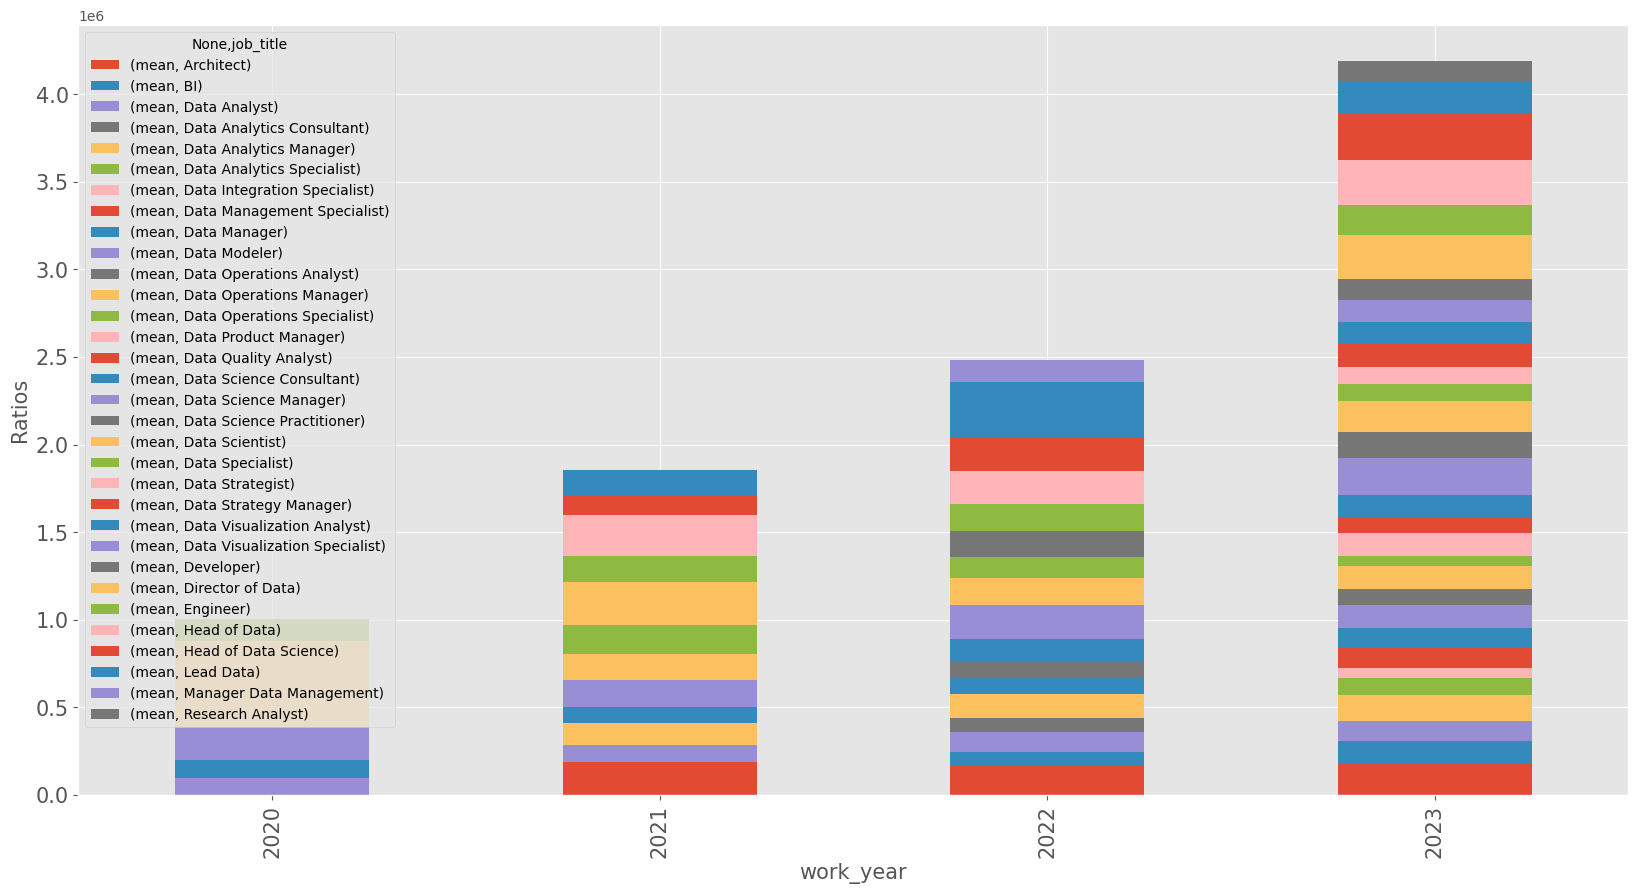

In [354]:
pd.crosstab(index=us_df['work_year'], columns=us_df['job_title'], values=us_df['salary_in_usd'], aggfunc=['mean']).round(2).head().plot(kind='bar', stacked=True, figsize=(20,10))
plt.xlabel('work_year', fontsize=15)
plt.ylabel('Ratios', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

### The number of Data job title has increased substantially in 2023 from previous years it seems.

<ipython-input-355-d6ae8eba76f0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  us_df.groupby(['job_title'])[['job_title','salary_in_usd']].mean().head(10).sort_values('salary_in_usd', ascending=False).plot(kind='bar')


<Axes: xlabel='job_title'>

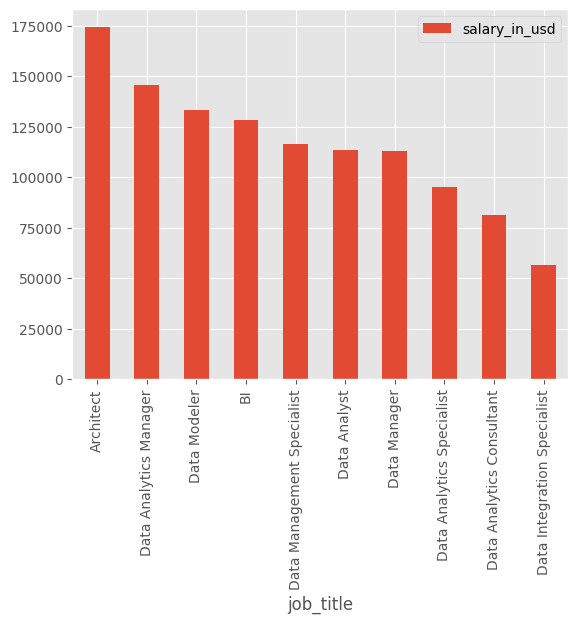

In [355]:
us_df.groupby(['job_title'])[['job_title','salary_in_usd']].mean().head(10).sort_values('salary_in_usd', ascending=False).plot(kind='bar')


#Data Analyst seems like an achievable goal after my master's program. Interestingly Data Scientist is not in the top 10 here.

In [356]:
#isolating data analyst jobs

a_df = us_df[us_df['job_title'] == 'Data Analyst']

<Axes: xlabel='work_year'>

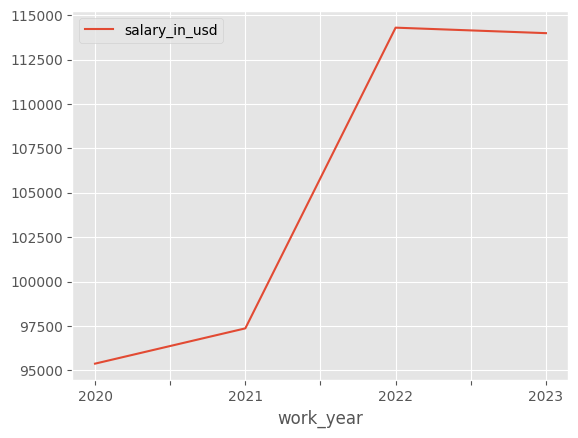

In [357]:
#average salary growth over time

a_df.groupby('work_year')[['salary_in_usd']].mean().plot(kind='line')

#Data analyst salaries have grew from 2020 through 2022. Wages seem to be stagnating this year.

<Axes: ylabel='company_size'>

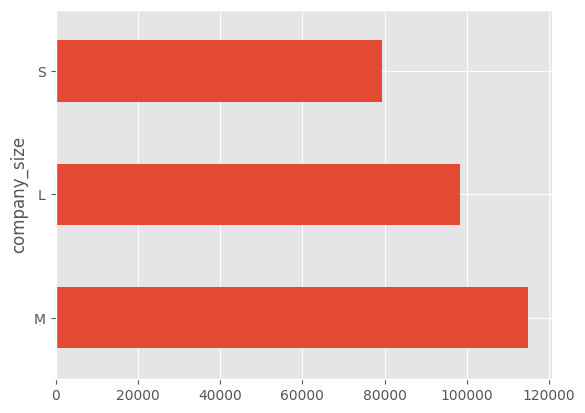

In [358]:
a_df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False).plot(kind='barh')

#Data Analyst at medium sized companies have higher average salaries.

<Axes: >

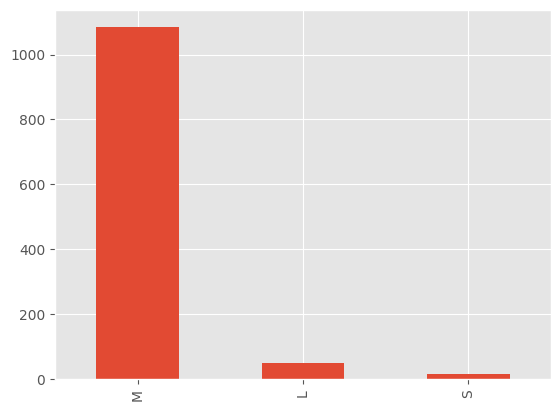

In [359]:
a_df['company_size'].value_counts().plot(kind='bar')

#The data is skewed toward medium size companies in this sample. I do not have enough data on S and L to determine whether accepting M companies will generally pay more.